<a href="https://colab.research.google.com/github/thapasujal01/iris-dataset-visualization/blob/main/Exam1SujalCPSMA4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on the analysis of the `Yel` (yellow cards) data:

Looking at the median yellow cards per nationality, **'Croatia'** has the highest median yellow cards.

To identify the nationality with the most outliers, a visual inspection of the boxplot (generated in cell `AeNf3NjLDjD-`) would be most effective. Outliers are typically represented by individual points extending beyond the whiskers of the boxplot. Without a specific metric for 'most outliers', it relies on visual interpretation.

# Exam 1
## Sujal Thapa
### CPSMA 4313

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

In [70]:
import io

url = "https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/refs/heads/master/CuratedDataSets/2022WorldCupPlayers.csv"
response = requests.get(url)
response.raise_for_status()
df = pd.read_csv(io.StringIO(response.text))
df.head()

,player,position,nationality,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52


In [71]:
from IPython.display import Image
Image(url="https://www.gpb.org/sites/default/files/styles/flexheight/public/npr_story_images/2022/12/19/gettyimages-1450300260-795d2b484bf61d411ad5f6ed16f6ba1cef4391a6_0.jpg?itok=YEEmrCxs",width=300)

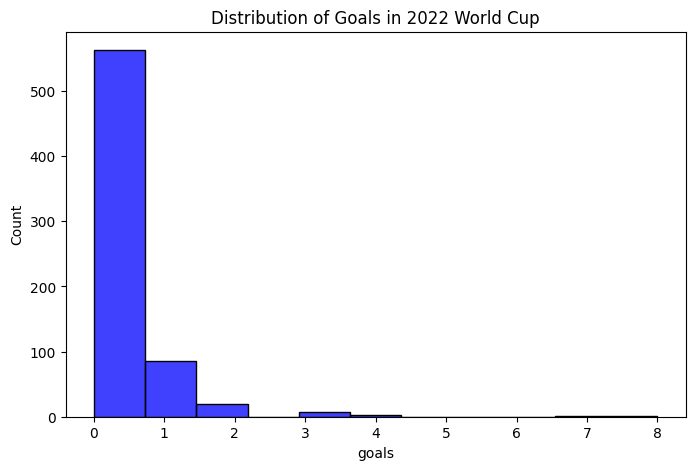

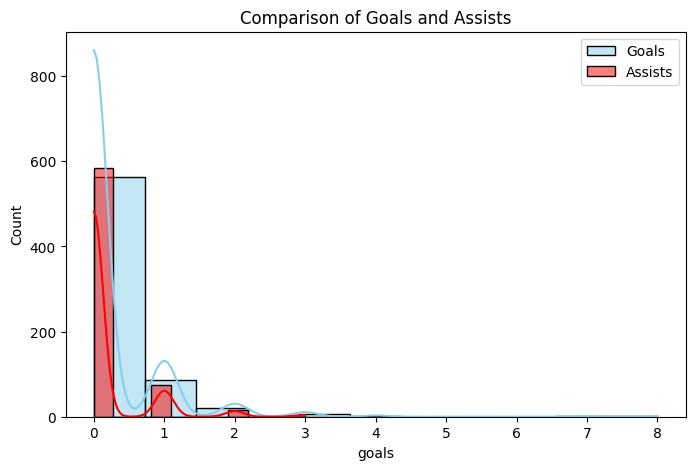

In [72]:
# (b) Goals Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['goals'], kde=False, color='blue')
plt.title('Distribution of Goals in 2022 World Cup')
plt.show()

# (c) Overlaid Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['goals'], color="skyblue", label="Goals", kde=True)
sns.histplot(df['assists'], color="red", label="Assists", kde=True)
plt.legend()
plt.title('Comparison of Goals and Assists')
plt.show()

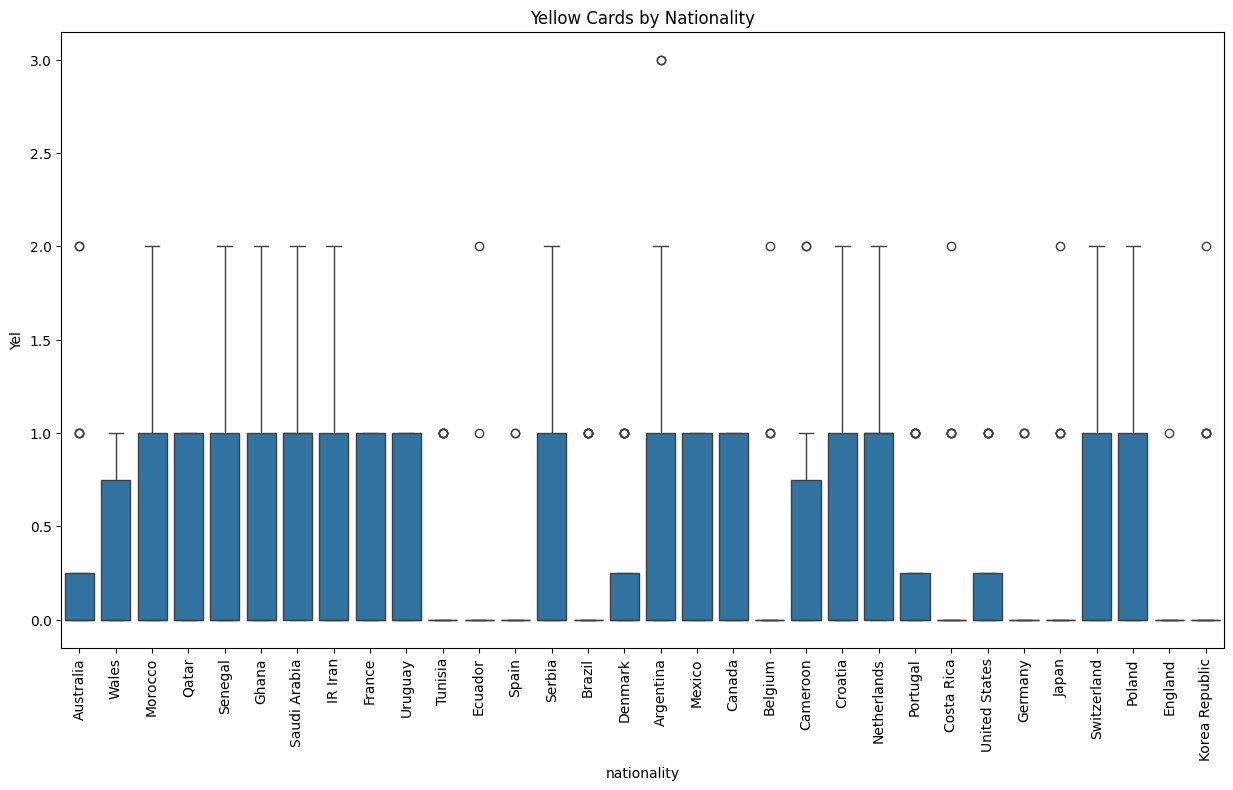

In [73]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='nationality', y='Yel', data=df)
plt.xticks(rotation=90) # Rotate labels so they don't overlap
plt.title('Yellow Cards by Nationality')
plt.show()

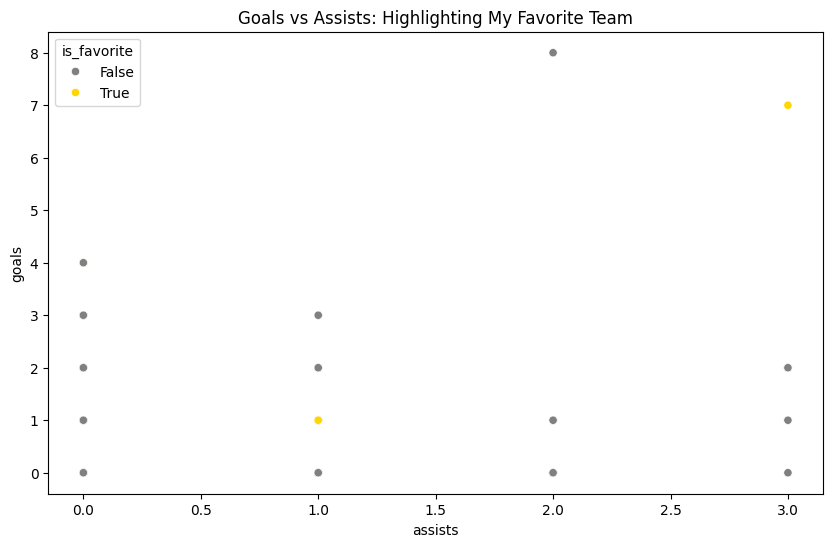

In [74]:
df['is_favorite'] = df['nationality'] == 'Argentina'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='assists', y='goals', hue='is_favorite', palette={True: 'gold', False: 'grey'})
plt.title('Goals vs Assists: Highlighting My Favorite Team')
plt.show()

In [78]:
median_yellow_cards = df.groupby('nationality')['Yel'].median().sort_values(ascending=False)
print("Nationalities by Median Yellow Cards:\n", median_yellow_cards.head())



Nationalities by Median Yellow Cards:
 nationality
Saudi Arabia    1.0
Netherlands     1.0
Argentina       0.0
Australia       0.0
Cameroon        0.0
Name: Yel, dtype: float64


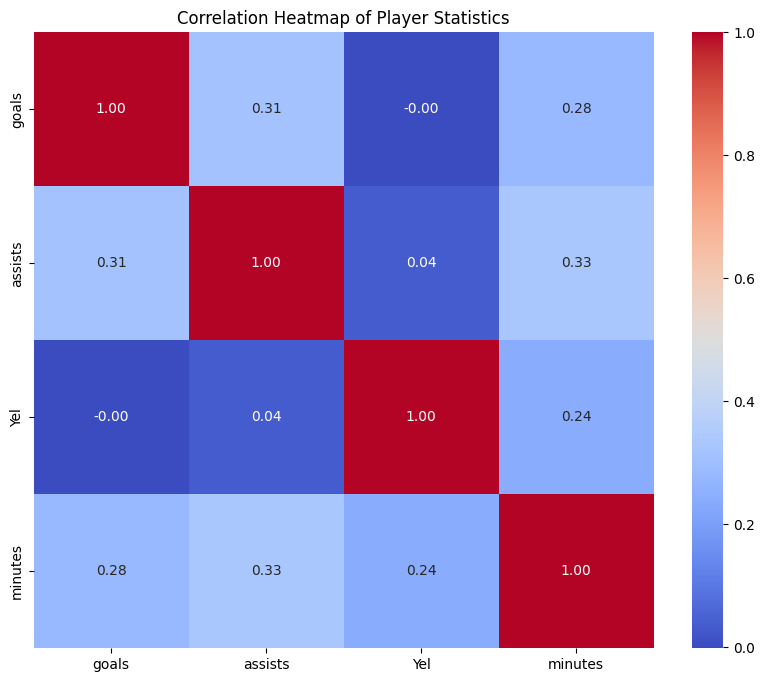

In [76]:
numeric_df = df[['goals', 'assists', 'Yel', 'minutes']]
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Player Statistics')
plt.show()

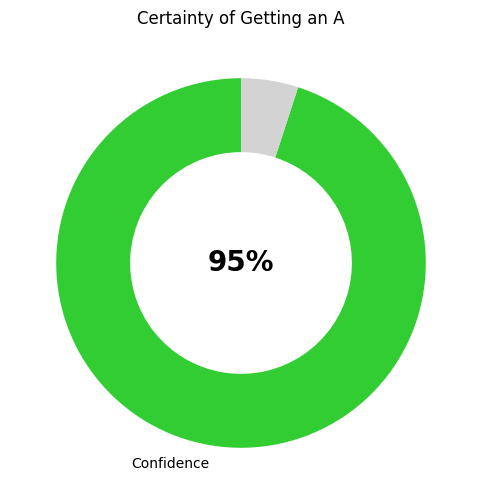

In [77]:

confidence = 95  # Percentage
remaining = 100 - confidence


plt.figure(figsize=(6, 6))
plt.pie([confidence, remaining], labels=['Confidence', ''],
        colors=['limegreen', 'lightgrey'], startangle=90, wedgeprops={'width': 0.4})
plt.text(0, 0, f'{confidence}%', ha='center', va='center', fontsize=20, fontweight='bold')
plt.title('Certainty of Getting an A')
plt.show()